In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blood-cell-cancer-all-4class/Blood cell Cancer [ALL]/[Malignant] early Pre-B/Snap_169.jpg
/kaggle/input/blood-cell-cancer-all-4class/Blood cell Cancer [ALL]/[Malignant] early Pre-B/Sap_148 (131).jpg
/kaggle/input/blood-cell-cancer-all-4class/Blood cell Cancer [ALL]/[Malignant] early Pre-B/Snap_228.jpg
/kaggle/input/blood-cell-cancer-all-4class/Blood cell Cancer [ALL]/[Malignant] early Pre-B/Snap_031 - Copy.jpg
/kaggle/input/blood-cell-cancer-all-4class/Blood cell Cancer [ALL]/[Malignant] early Pre-B/Snap_146 - Copy.jpg
/kaggle/input/blood-cell-cancer-all-4class/Blood cell Cancer [ALL]/[Malignant] early Pre-B/Snp_147 (131).jpg
/kaggle/input/blood-cell-cancer-all-4class/Blood cell Cancer [ALL]/[Malignant] early Pre-B/Snap_083.jpg
/kaggle/input/blood-cell-cancer-all-4class/Blood cell Cancer [ALL]/[Malignant] early Pre-B/Snap_043.jpg
/kaggle/input/blood-cell-cancer-all-4class/Blood cell Cancer [ALL]/[Malignant] early Pre-B/Sn1ap_024 (1).jpg
/kaggle/input/blood-cell-cancer-all

In [2]:
base_dir = '/kaggle/input/blood-cell-cancer-all-4class/Blood cell Cancer [ALL]'

In [3]:
categories = {
    'Benign': 'Benign',
    'Malignant_Pre_B': '[Malignant] Pre-B',
    'Malignant_Pro_B': '[Malignant] Pro-B',
    'Malignant_early_Pre_B': '[Malignant] early Pre-B'
}

file_paths = []
labels = []

for label, subfolder in categories.items():
    folder_path = os.path.join(base_dir, subfolder)
    for filename in os.listdir(folder_path):
        file_paths.append(os.path.join(folder_path, filename))
        labels.append(label)

df = pd.DataFrame({
    'file_path': file_paths,
    'label': labels
})

In [4]:
df.head()

,file_path,label
0,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign
1,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign
2,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign
3,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign
4,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign


In [5]:
df.tail()

,file_path,label
3237,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Malignant_early_Pre_B
3238,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Malignant_early_Pre_B
3239,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Malignant_early_Pre_B
3240,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Malignant_early_Pre_B
3241,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Malignant_early_Pre_B


In [6]:
df.shape

(3242, 2)

In [7]:
df.columns

Index(['file_path', 'label'], dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

file_path    0
label        0
dtype: int64

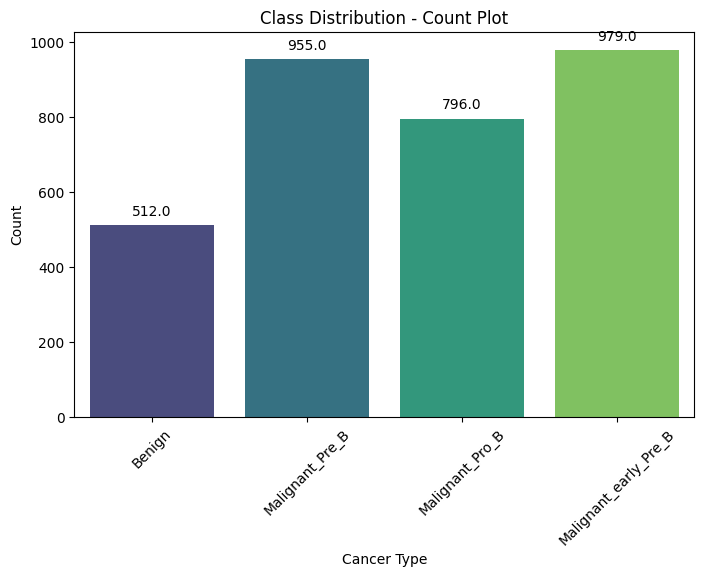

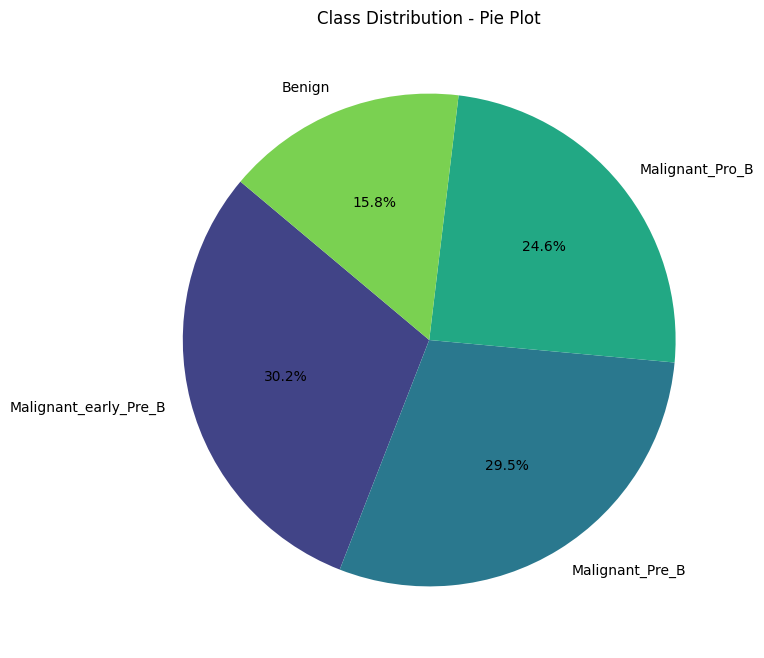

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='label', data=df, palette='viridis')
plt.title('Class Distribution - Count Plot')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

plt.figure(figsize=(8, 8))
labels = df['label'].value_counts().index  
sizes = df['label'].value_counts().values  
colors = sns.color_palette('viridis', len(labels))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Class Distribution - Pie Plot')
plt.show()

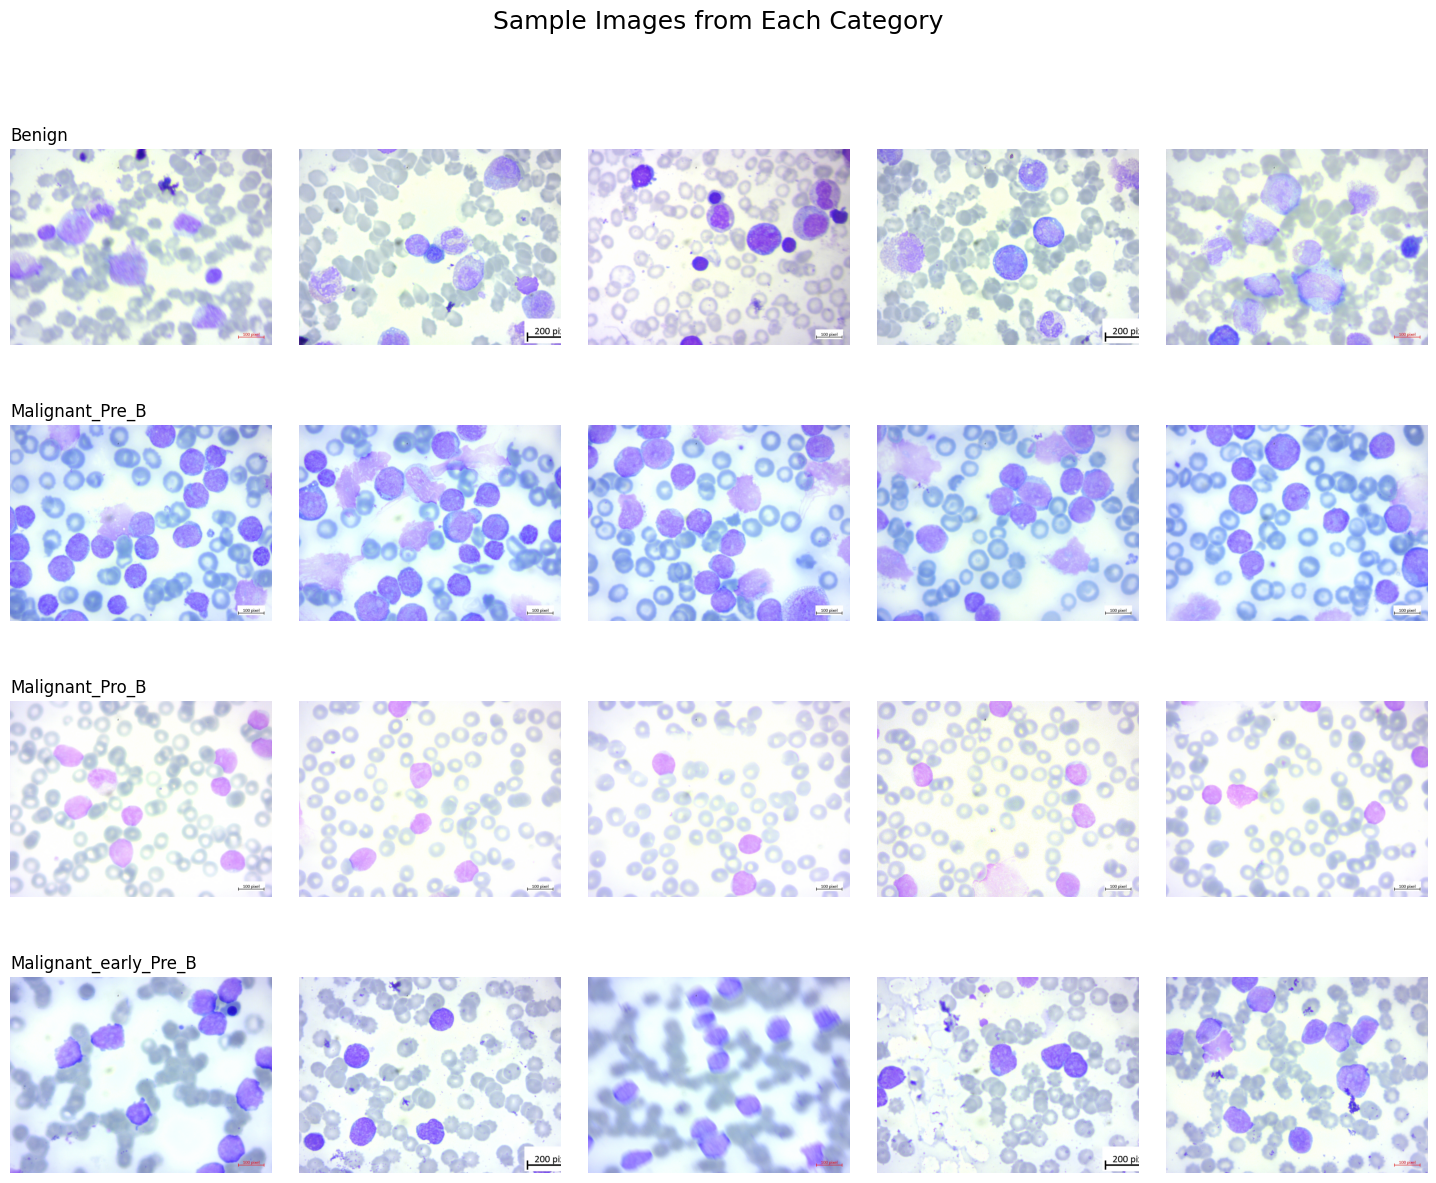

In [11]:
import random
from PIL import Image

num_images = 5

fig, axes = plt.subplots(len(categories), num_images, figsize=(15, 12))
fig.suptitle('Sample Images from Each Category', fontsize=18, y=1.02, ha='center') 

for i, (label, subfolder) in enumerate(categories.items()):
    category_images = df[df['label'] == label]['file_path'].tolist()
    selected_images = random.sample(category_images, num_images)
    
    for j, img_path in enumerate(selected_images):
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')  
        
        if j == 0:
            axes[i, j].set_title(label, fontsize=12, loc='left')

plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=5.0)
plt.subplots_adjust(top=0.92)
plt.show()

In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['file_path']], df['label'])

In [14]:
df_resampled = pd.DataFrame(X_resampled, columns=['file_path'])
df_resampled['label'] = y_resampled

In [15]:
print("\nClass distribution after oversampling:")
print(df_resampled['label'].value_counts())


Class distribution after oversampling:
label
Benign                   979
Malignant_Pre_B          979
Malignant_Pro_B          979
Malignant_early_Pre_B    979
Name: count, dtype: int64


In [16]:
df_resampled

,file_path,label
0,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign
1,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign
2,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign
3,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign
4,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign
...,...,...
3911,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Malignant_Pro_B
3912,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Malignant_Pro_B
3913,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Malignant_Pro_B
3914,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Malignant_Pro_B


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_resampled['label_encoded'] = le.fit_transform(df_resampled['label'])

In [18]:
df_resampled

,file_path,label,label_encoded
0,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign,0
1,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign,0
2,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign,0
3,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign,0
4,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Benign,0
...,...,...,...
3911,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Malignant_Pro_B,2
3912,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Malignant_Pro_B,2
3913,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Malignant_Pro_B,2
3914,/kaggle/input/blood-cell-cancer-all-4class/Blo...,Malignant_Pro_B,2


In [19]:
df_resampled['label_encoded'].unique()

array([0, 1, 2, 3])

In [20]:
df_resampled['label_encoded'].value_counts()

label_encoded
0    979
1    979
2    979
3    979
Name: count, dtype: int64

In [21]:
df_resampled = df_resampled[['file_path', 'label_encoded']]

In [22]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [23]:
df_resampled['label_encoded'] = df_resampled['label_encoded'].astype(str)

In [24]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['label_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['label_encoded'] 
)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='file_path',  
    y_col='label_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='file_path',  
    y_col='label_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='file_path', 
    y_col='label_encoded',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 3132 validated image filenames belonging to 4 classes.
Found 392 validated image filenames belonging to 4 classes.
Found 392 validated image filenames belonging to 4 classes.


In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [27]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [28]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [29]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inceptionv3_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x)  

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inceptionv3_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1734928452.864502      71 service.cc:145] XLA service 0x7abdf005bec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734928452.864616      71 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734928452.864626      71 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1734928463.477703     103 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



  1/196 ━━━━━━━━━━━━━━━━━━━━ 1:42:00 31s/step - accuracy: 0.2500 - loss: 1.9874

I0000 00:00:1734928473.829998      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 99/196 ━━━━━━━━━━━━━━━━━━━━ 28s 292ms/step - accuracy: 0.7671 - loss: 0.6669

I0000 00:00:1734928512.988142     144 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.8064 - loss: 0.5500

I0000 00:00:1734928565.313686     170 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



196/196 ━━━━━━━━━━━━━━━━━━━━ 129s 502ms/step - accuracy: 0.8066 - loss: 0.5492 - val_accuracy: 0.5867 - val_loss: 1.5195
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 211ms/step - accuracy: 0.9369 - loss: 0.1827 - val_accuracy: 0.8316 - val_loss: 0.4661
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 211ms/step - accuracy: 0.9519 - loss: 0.1295 - val_accuracy: 0.9337 - val_loss: 0.2318
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 209ms/step - accuracy: 0.9830 - loss: 0.0652 - val_accuracy: 0.9107 - val_loss: 0.2662
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 212ms/step - accuracy: 0.9672 - loss: 0.0991 - val_accuracy: 0.9184 - val_loss: 0.2001


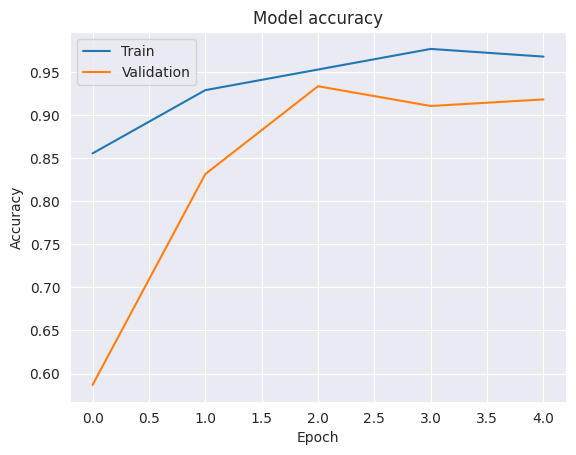

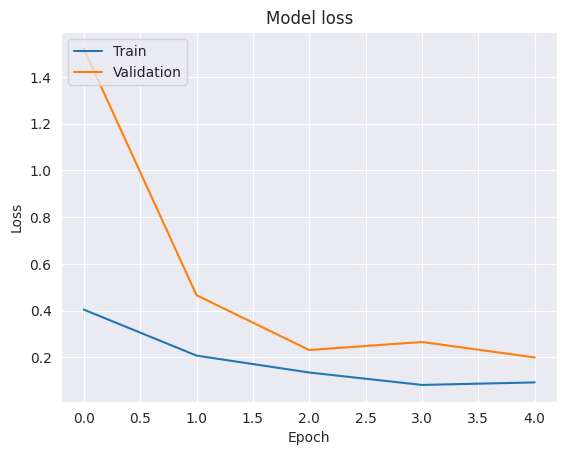

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 466ms/step


In [33]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        98
           1       0.98      0.98      0.98        98
           2       0.99      0.94      0.96        98
           3       0.98      0.83      0.90        98

    accuracy                           0.94       392
   macro avg       0.94      0.94      0.94       392
weighted avg       0.94      0.94      0.94       392



In [34]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

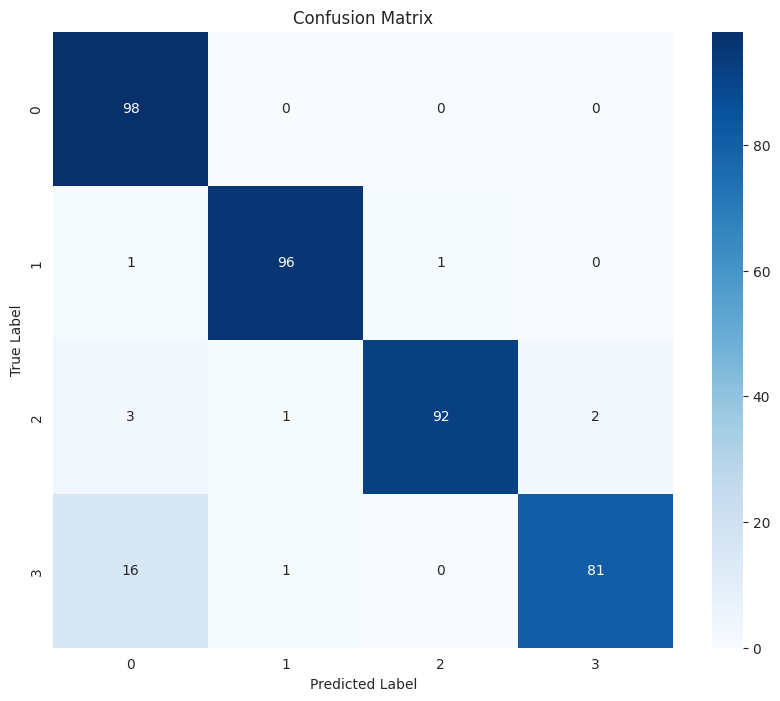

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)  
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(4, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [37]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1734928781.263900     275 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



 34/196 ━━━━━━━━━━━━━━━━━━━━ 32s 201ms/step - accuracy: 0.7085 - loss: 0.7783

I0000 00:00:1734928808.822149     307 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.8349 - loss: 0.4631

I0000 00:00:1734928863.905130     333 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



196/196 ━━━━━━━━━━━━━━━━━━━━ 105s 397ms/step - accuracy: 0.8353 - loss: 0.4623 - val_accuracy: 0.9617 - val_loss: 0.1255
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 47s 233ms/step - accuracy: 0.9477 - loss: 0.1517 - val_accuracy: 0.9515 - val_loss: 0.1286
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 47s 234ms/step - accuracy: 0.9642 - loss: 0.1074 - val_accuracy: 0.9592 - val_loss: 0.1375
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 48s 240ms/step - accuracy: 0.9790 - loss: 0.0709 - val_accuracy: 0.9311 - val_loss: 0.1945
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 50s 247ms/step - accuracy: 0.9775 - loss: 0.0633 - val_accuracy: 0.9796 - val_loss: 0.0626


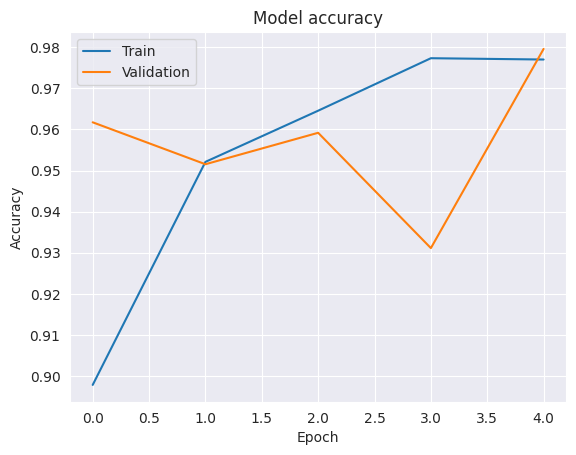

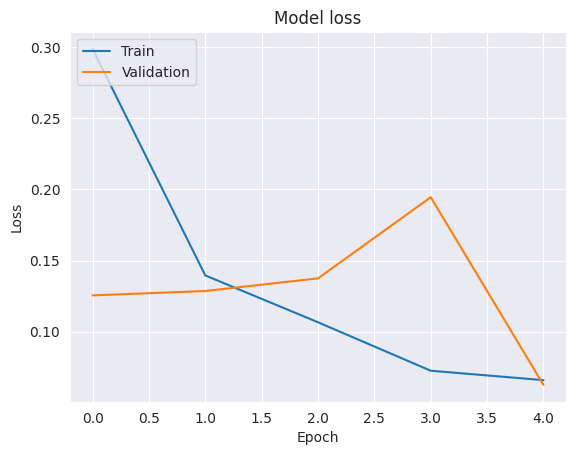

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 307ms/step


In [40]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        98
           1       1.00      0.99      0.99        98
           2       1.00      1.00      1.00        98
           3       1.00      0.96      0.98        98

    accuracy                           0.99       392
   macro avg       0.99      0.99      0.99       392
weighted avg       0.99      0.99      0.99       392



In [41]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

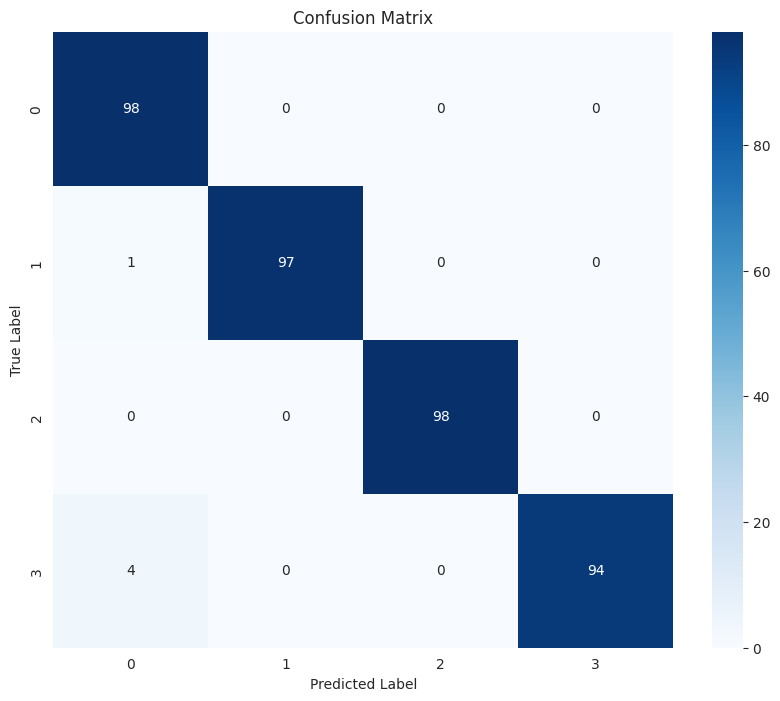

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [43]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_mobilenet_model(input_shape):

    inputs = Input(shape=input_shape)
    
    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 1024  
    x = Reshape((height * width, channels))(x)  

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_mobilenet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [44]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1734929092.912795     439 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



 45/196 ━━━━━━━━━━━━━━━━━━━━ 28s 188ms/step - accuracy: 0.7856 - loss: 0.6659

I0000 00:00:1734929116.440143     473 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.8761 - loss: 0.3810

I0000 00:00:1734929159.987154     504 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



196/196 ━━━━━━━━━━━━━━━━━━━━ 84s 320ms/step - accuracy: 0.8766 - loss: 0.3795 - val_accuracy: 0.9694 - val_loss: 0.1153
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 199ms/step - accuracy: 0.9664 - loss: 0.1028 - val_accuracy: 0.9872 - val_loss: 0.0297
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 196ms/step - accuracy: 0.9750 - loss: 0.0759 - val_accuracy: 0.9031 - val_loss: 0.3077
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 205ms/step - accuracy: 0.9819 - loss: 0.0535 - val_accuracy: 0.9694 - val_loss: 0.0799
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - accuracy: 0.9893 - loss: 0.0304 - val_accuracy: 0.9566 - val_loss: 0.1309


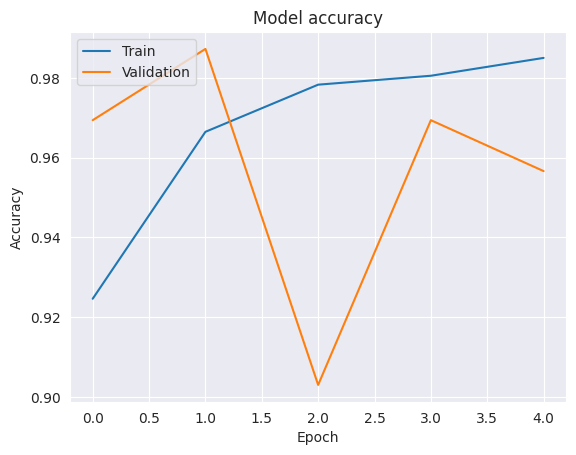

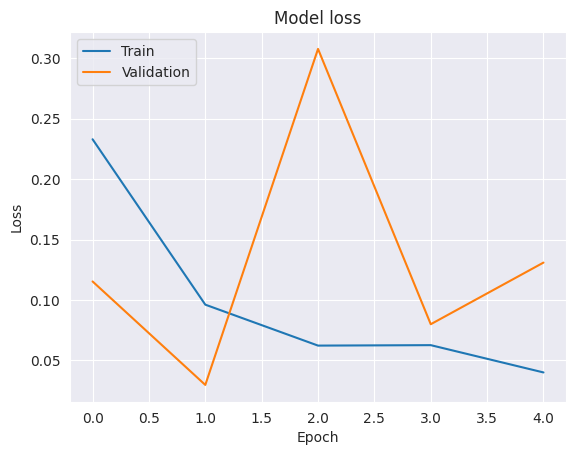

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [46]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 246ms/step


In [47]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        98
           1       0.98      0.99      0.98        98
           2       1.00      0.99      0.99        98
           3       0.98      0.98      0.98        98

    accuracy                           0.98       392
   macro avg       0.98      0.98      0.98       392
weighted avg       0.98      0.98      0.98       392



In [48]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

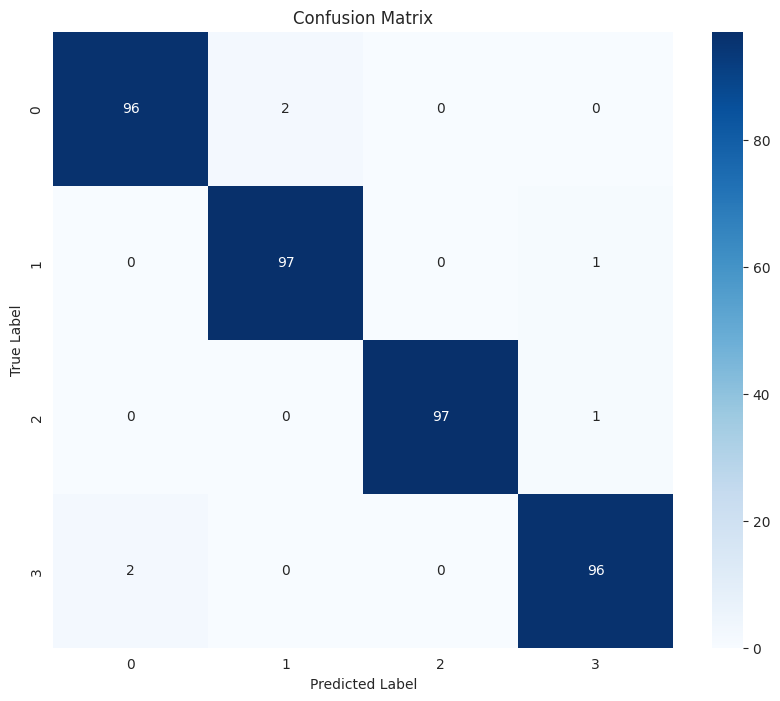

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

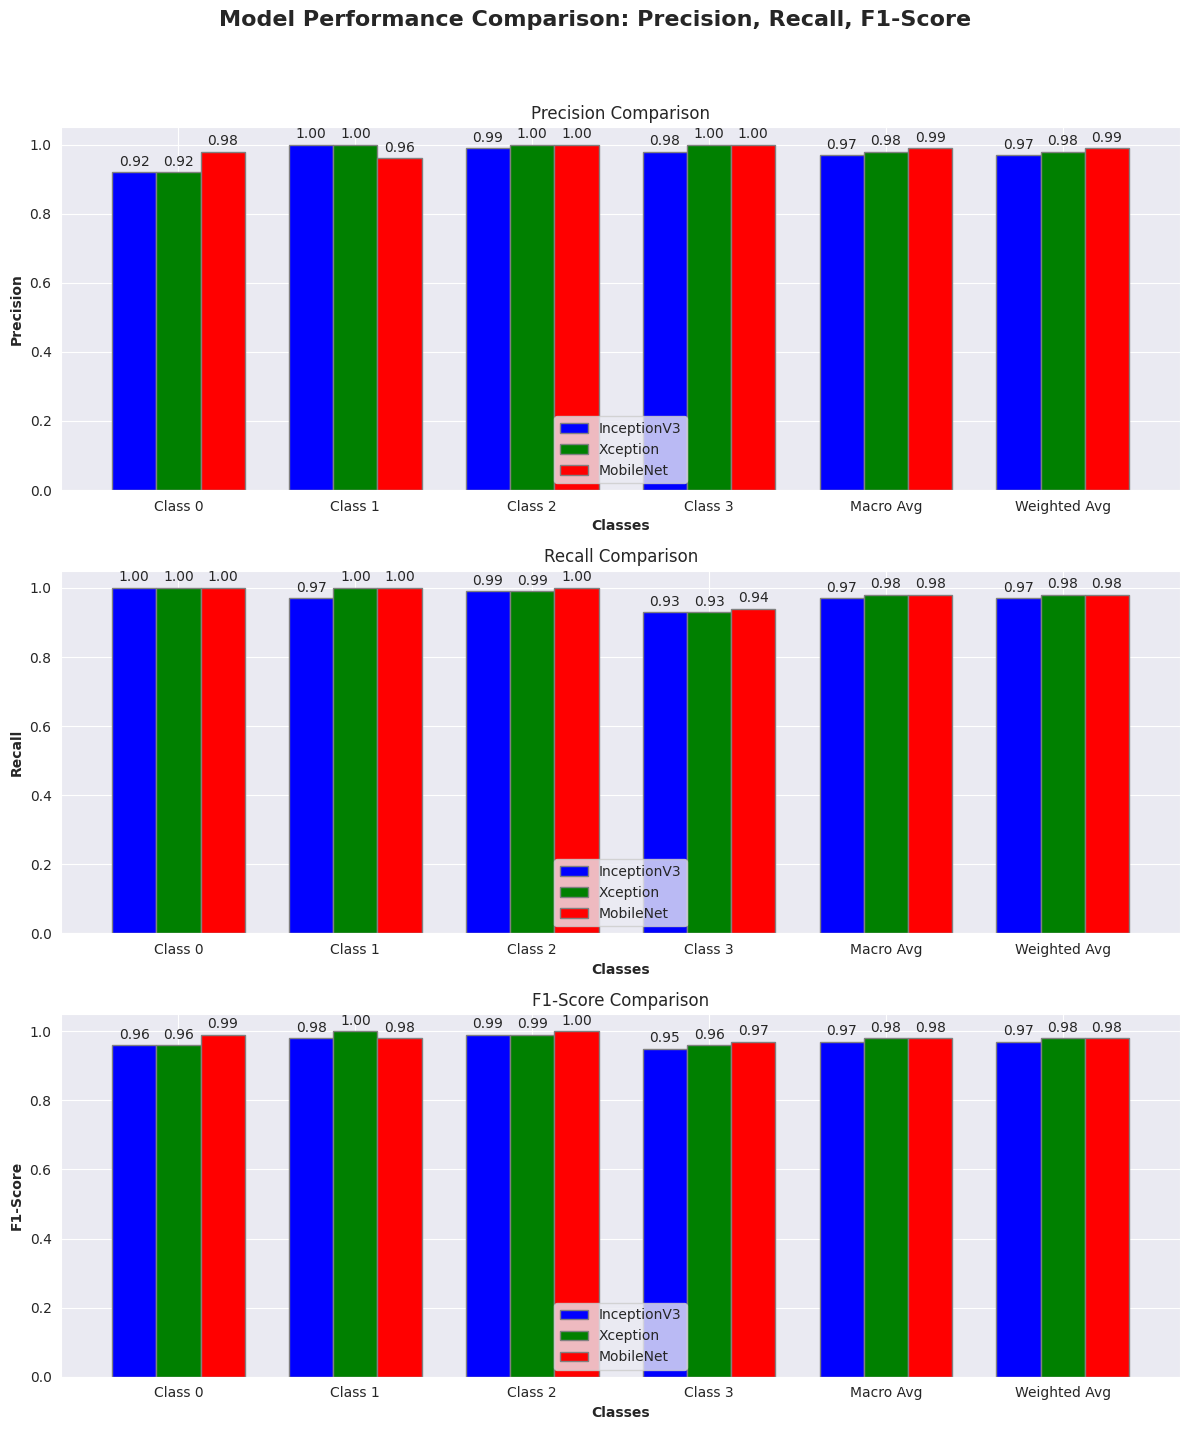

In [50]:
metrics = ['Precision', 'Recall', 'F1-Score']
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Macro Avg', 'Weighted Avg']
inception_scores = [
    [0.92, 1.00, 0.99, 0.98, 0.97, 0.97], 
    [1.00, 0.97, 0.99, 0.93, 0.97, 0.97],  
    [0.96, 0.98, 0.99, 0.95, 0.97, 0.97]  
]
xception_scores = [
    [0.92, 1.00, 1.00, 1.00, 0.98, 0.98],  
    [1.00, 1.00, 0.99, 0.93, 0.98, 0.98],  
    [0.96, 1.00, 0.99, 0.96, 0.98, 0.98] 
]
mobilenet_scores = [
    [0.98, 0.96, 1.00, 1.00, 0.99, 0.99], 
    [1.00, 1.00, 1.00, 0.94, 0.98, 0.98],  
    [0.99, 0.98, 1.00, 0.97, 0.98, 0.98]   
]

bar_width = 0.25
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

fig, ax = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle("Model Performance Comparison: Precision, Recall, F1-Score", fontsize=16, fontweight='bold')

for i, metric in enumerate(metrics):
    ax[i].bar(r1, inception_scores[i], color='b', width=bar_width, edgecolor='grey', label='InceptionV3')
    ax[i].bar(r2, xception_scores[i], color='g', width=bar_width, edgecolor='grey', label='Xception')
    ax[i].bar(r3, mobilenet_scores[i], color='r', width=bar_width, edgecolor='grey', label='MobileNet')
    
    ax[i].set_xlabel('Classes', fontweight='bold')
    ax[i].set_ylabel(metric, fontweight='bold')
    ax[i].set_title(f'{metric} Comparison')
    ax[i].set_xticks([r + bar_width for r in range(len(classes))])
    ax[i].set_xticklabels(classes)
    ax[i].legend()
    
    for bar_container, score_set in zip([r1, r2, r3], [inception_scores[i], xception_scores[i], mobilenet_scores[i]]):
        for bar, score in zip(bar_container, score_set):
            ax[i].text(bar, score + 0.01, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()